# Desafio Estágio - Análise de Dados/Engenharia de Analytics

## Introdução

Este relatório tem como objetivo conduzir uma análise detalhada dos indicadores de performance da Northwind Traders, uma empresa que atua na gestão de pedidos, produtos, clientes, fornecedores e diversos outros aspectos de seu negócio. A análise de dados desempenha um papel crucial na compreensão dos padrões de desempenho e no fornecimento de insights valiosos para o crescimento da empresa.

Para realizar essa análise, foi usado as bibliotecas e ferramentas:

- pandas: para manipulação e análise de dados tabulares.
- numpy: para operações matemáticas e estatísticas.
- matplotlib e seaborn: para criação de gráficos e visualizações.
- scikit-learn: para aplicar técnicas de aprendizado de máquina e modelagem preditiva.

De inicio foi carregados os dados relevantes da empresa Northwind Traders. Os dados consistem em informações de clientes, produtos, pedidos, fornecedores e outras categorias essenciais para a operação da empresa.

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [176]:
uploaded = files.upload()

Saving categories.csv to categories (4).csv
Saving customer_customer_demo.csv to customer_customer_demo (4).csv
Saving customer_demographics.csv to customer_demographics (4).csv
Saving customers.csv to customers (4).csv
Saving employee_territories.csv to employee_territories (4).csv
Saving employees.csv to employees (4).csv
Saving order_details.csv to order_details (4).csv
Saving orders.csv to orders (4).csv
Saving products.csv to products (4).csv
Saving region.csv to region (4).csv
Saving shippers.csv to shippers (4).csv
Saving suppliers.csv to suppliers (4).csv
Saving territories.csv to territories (4).csv
Saving us_states.csv to us_states (4).csv


In [177]:
def load_csv(filename):
    try:
        df = pd.read_csv(filename, delimiter=',')
    except pd.errors.ParserError:
        df = pd.read_csv(filename, delimiter=';')
    return df
filenames = [
    'categories.csv', 'customer_customer_demo.csv', 'customer_demographics.csv', 'customers.csv',
    'employee_territories.csv', 'employees.csv', 'order_details.csv', 'orders.csv', 'products.csv',
    'region.csv', 'shippers.csv', 'suppliers.csv', 'territories.csv', 'us_states.csv'
]

dataframes = {}

for filename in filenames:
    df = load_csv(filename)
    dataframes[filename] = df

Preenche os valores ausentes com 'N/A' para facilitar a compreensão e visualização dos dados. Se os dados ausentes não fossem preenchidos com um valor padrão, como 'N/A', isso poderia causar problemas em várias etapas da análise de dados

In [178]:
for filenames in filenames:
    df = dataframes[filenames]
    for column in df.columns:
        df[column].fillna('N/A', inplace=True)

In [193]:
# Apresenta informações sobre valores ausentes após o preenchimento.
for filename, df in dataframes.items():
    missing_values = df.isnull().sum()
    print(f"Valores Ausentes no DataFrame '{filename}':")
    print(missing_values[missing_values > 0])

Valores Ausentes no DataFrame 'categories.csv':
Series([], dtype: int64)
Valores Ausentes no DataFrame 'customer_customer_demo.csv':
Series([], dtype: float64)
Valores Ausentes no DataFrame 'customer_demographics.csv':
Series([], dtype: float64)
Valores Ausentes no DataFrame 'customers.csv':
Series([], dtype: int64)
Valores Ausentes no DataFrame 'employee_territories.csv':
Series([], dtype: int64)
Valores Ausentes no DataFrame 'employees.csv':
Series([], dtype: int64)
Valores Ausentes no DataFrame 'order_details.csv':
Series([], dtype: int64)
Valores Ausentes no DataFrame 'orders.csv':
Series([], dtype: int64)
Valores Ausentes no DataFrame 'products.csv':
Series([], dtype: int64)
Valores Ausentes no DataFrame 'region.csv':
Series([], dtype: int64)
Valores Ausentes no DataFrame 'shippers.csv':
Series([], dtype: int64)
Valores Ausentes no DataFrame 'suppliers.csv':
Series([], dtype: int64)
Valores Ausentes no DataFrame 'territories.csv':
Series([], dtype: int64)
Valores Ausentes no DataF

Após a verificação da adequada substituição dos valores faltantes, podemos continuar com a análise de dados.

In [180]:
# Carregando os DataFrames relevantes.
orders_df = dataframes['orders.csv']
customers_df = dataframes['customers.csv']
products_df = dataframes['products.csv']
categories_df = dataframes['categories.csv']
employees_df = dataframes['employees.csv']
territories_df = dataframes['territories.csv']
order_details_df = dataframes['order_details.csv']
suppliers_df = dataframes['suppliers.csv']

In [181]:
order_details_df = pd.read_csv('order_details.csv', delimiter=';')
order_details_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    2155 non-null   int64  
 1   product_id  2155 non-null   int64  
 2   unit_price  2155 non-null   float64
 3   quantity    2155 non-null   int64  
 4   discount    2155 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 84.3 KB


In [182]:
products_df = pd.read_csv('products.csv', delimiter=';')
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         77 non-null     int64  
 1   product_name       77 non-null     object 
 2   supplier_id        77 non-null     int64  
 3   category_id        77 non-null     int64  
 4   quantity_per_unit  77 non-null     object 
 5   unit_price         77 non-null     float64
 6   units_in_stock     77 non-null     int64  
 7   units_on_order     77 non-null     int64  
 8   reorder_level      77 non-null     int64  
 9   discontinued       77 non-null     int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 6.1+ KB


Este trecho de código carrega os DataFrames relevantes e fornece informações sobre dois deles `'order_details_df'` e `'products_df'`. Também demonstra como ordenar o DataFrame `'products_df'` com base nas unidades em ordem de forma decrescente. Esta etapa é fundamental para preparar os dados para a análise subsequente.

É notavel que existe produtos com muita demanda `units_on_order` e outros com pouca demanda e isso mostra um problema substancial da Northwind Traders.



In [183]:
# Ordenando produtos por unidades em ordem.
sorted_products_on_order = products_df.sort_values(by='units_on_order', ascending=False)
sorted_products_on_order

,product_id,product_name,supplier_id,category_id,quantity_per_unit,unit_price,units_in_stock,units_on_order,reorder_level,discontinued
65,66,Louisiana Hot Spiced Okra,2,2,24 - 8 oz jars,17.00,4,100,20,0
63,64,Wimmers gute Semmelknödel,12,5,20 bags x 4 pieces,33.25,22,80,30,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
44,45,Rogede sild,21,8,1k pkg.,9.50,5,70,15,0
30,31,Gorgonzola Telino,14,4,12 - 100 g pkgs,12.50,0,70,20,0
...,...,...,...,...,...,...,...,...,...,...
34,35,Steeleye Stout,16,1,24 - 12 oz bottles,18.00,20,0,15,0
35,36,Inlagd Sill,17,8,24 - 250 g jars,19.00,112,0,20,0
37,38,Côte de Blaye,18,1,12 - 75 cl bottles,263.50,17,0,15,0
39,40,Boston Crab Meat,19,8,24 - 4 oz tins,18.40,123,0,30,0


# Análise de Produtos de Baixa Demanda com Alto Estoque e Alto Reabastecimento
Nesta seção, foi realizado uma análise detalhada dos produtos que apresentam baixa demanda, altos níveis de estoque e níveis elevados de reabastecimento. Isso é fundamental para identificar áreas de otimização de inventário e gestão de estoque na empresa Northwind Traders.

### Filtragem de Produtos
Para identificar os produtos de baixa demanda com alto estoque e alto reabastecimento, apliquei um filtro no DataFrame de produtos `('products_df')`. Especificamente, por produtos que atendam aos seguintes critérios:
* Unidades em Pedido `('units_on_order')` igual a zero: Isso indica que não há
pedidos pendentes para esses produtos.
* Unidades em Estoque `('units_in_stock')` igual ou superior a 5: Produtos com um estoque considerável.
* Nível de Reabastecimento `('reorder_level')` igual ou superior a zero: Indica que há um nível mínimo de reabastecimento estabelecido.

### Classificação dos Produtos
Após a filtragem, os produtos resultantes com base no `'Nível de Reabastecimento'` em ordem decrescente. Isso nos permite identificar os produtos com os níveis de reabastecimento mais altos em primeiro lugar.

### Visualização dos Dados
Para uma representação visual dos produtos, foi feito um gráfico de barras. Neste gráfico:

* O eixo x representa o nome do produto.
* O eixo y representa a quantidade de unidades.
* três barras para cada produto, indicando:
  1. Estoque (em verde)
  2. Nível de Reabastecimento (em azul)
  3. Unidades em Pedido (em vermelho)

O gráfico permite uma rápida comparação entre esses três aspectos importantes dos produtos, identificando aqueles com alto estoque e alto reabastecimento.

### Resultados
A análise e visualização revelam os produtos que podem estar enfrentando um excesso de estoque e reabastecimento, o que pode resultar em custos desnecessários para a empresa. Esses produtos podem requerer uma revisão das estratégias de estoque e reabastecimento, incluindo a possível redução de estoque ou ajustes no nível de reabastecimento.

A identificação desses produtos é um passo importante na otimização do gerenciamento de inventário da Northwind Traders e na redução de custos operacionais.



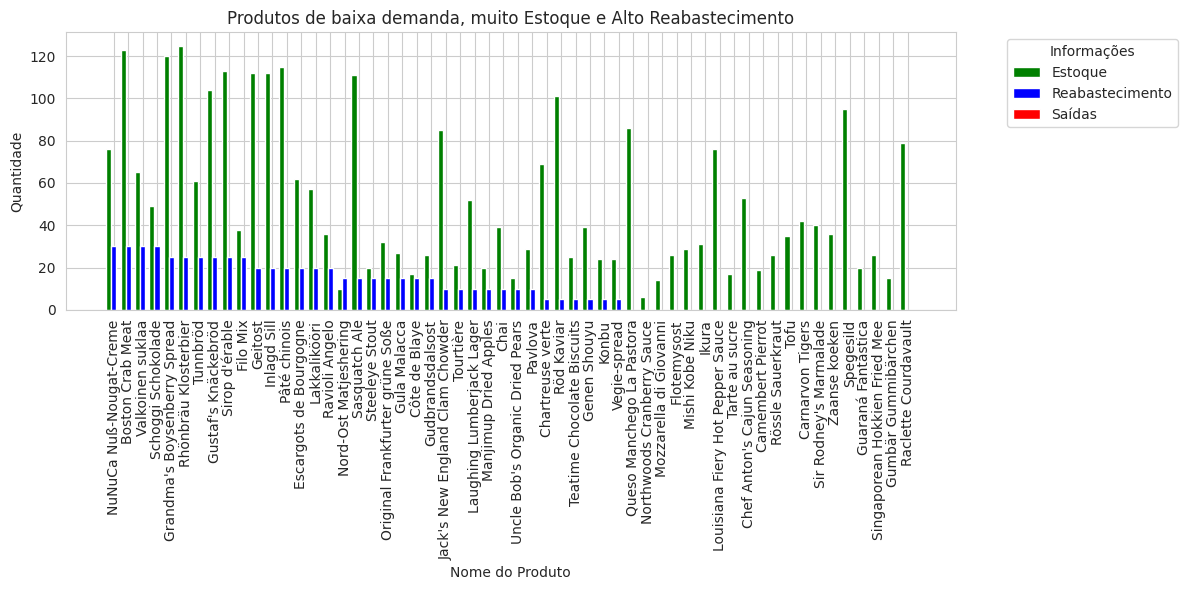

In [184]:
worst_sales_filter = products_df[(products_df['units_on_order'] == 0) &
                                 (products_df['units_in_stock'] >= 5) &
                                 (products_df['reorder_level'] >= 0)]

worst_sales_filter = worst_sales_filter.sort_values(by='reorder_level', ascending=False)

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

width = 0.35
x = range(len(worst_sales_filter))

plt.bar(x, worst_sales_filter['units_in_stock'], width, label='Estoque', color='green')
plt.bar([i + width for i in x], worst_sales_filter['reorder_level'], width, label='Reabastecimento', color='blue')
plt.bar([i + width*2 for i in x], worst_sales_filter['units_on_order'], width, label='Saídas', color='red')

plt.xlabel('Nome do Produto')
plt.ylabel('Quantidade')
plt.title('Produtos de baixa demanda, muito Estoque e Alto Reabastecimento')
plt.xticks([i + width for i in x], worst_sales_filter['product_name'], rotation=90)

plt.legend(title='Informações', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Visualização de Produtos de Alta Demanda com Pouco Estoque e Alto Reabastecimento
Já nessa seção, destaca produtos que se enquadram na categoria de alta demanda, apresentam baixo estoque e têm um nível de reabastecimento semelhante aos de baixa demanda.

### Filtragem de Produtos
Essa análise é basicamente a mesma aplicanda anteriormente, no qual, um filtro é introduzido nos dados de produtos `'products_df'` com base em três critérios específicos:

* Unidades em Pedido `'units_on_order'` igual ou superior a 1: Indicando que esses produtos estão atualmente em processo de pedido ou reabastecimento.
* Unidades em Estoque `'units_in_stock'` inferior a 100: Produtos com estoque consideravelmente baixo.
* Nível de Reabastecimento `'reorder_level'` igual ou superior a zero: Indicando que há um nível mínimo de reabastecimento estabelecido.


### Racionalização da Análise
Esta análise foca em produtos de alta demanda que, apesar da alta demanda, podem apresentar desafios de disponibilidade devido a estoque reduzido. A identificação desses produtos é fundamental para evitar perdas de vendas devido à falta de estoque.

A disponibilidade insuficiente de produtos de alta demanda devido ao baixo estoque pode levar a uma experiência insatisfatória dos clientes, resultando em um possível aumento no churn. Clientes insatisfeitos devido à falta de disponibilidade de produtos podem optar por abandonar a empresa em busca de fornecedores mais confiáveis.



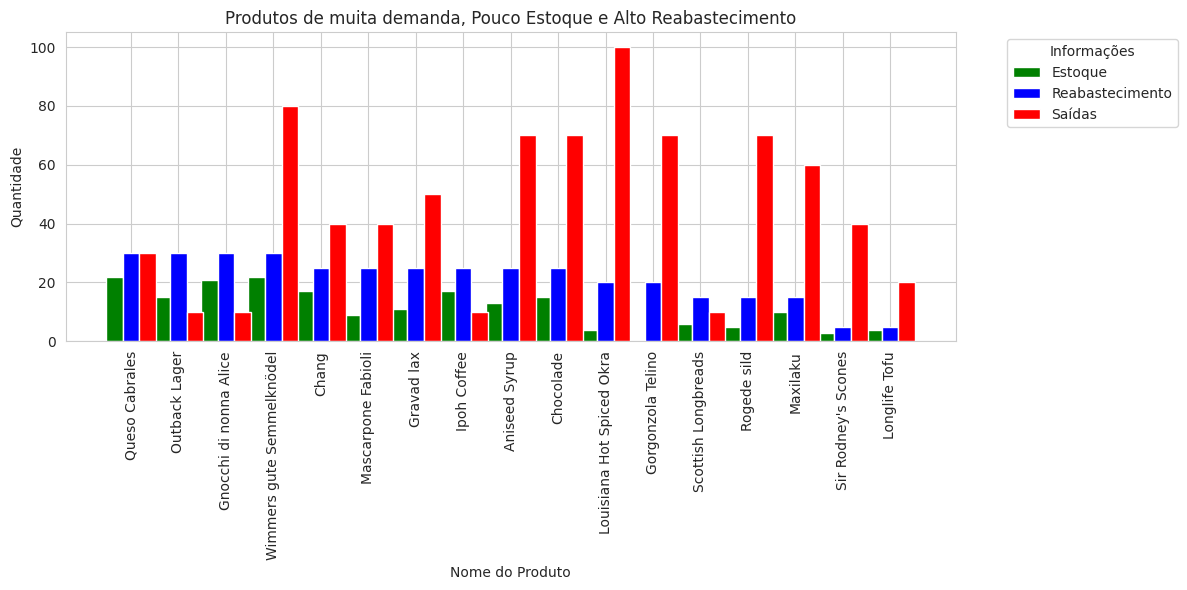

In [185]:
best_sales_filter = products_df[(products_df['units_on_order'] >= 1) &
                                 (products_df['units_in_stock'] < 100) &
                                 (products_df['reorder_level'] >= 0)]

best_sales_filter = best_sales_filter.sort_values(by='reorder_level', ascending=False)

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

width = 0.35
x = range(len(best_sales_filter))

plt.bar(x, best_sales_filter['units_in_stock'], width, label='Estoque', color='green')
plt.bar([i + width for i in x], best_sales_filter['reorder_level'], width, label='Reabastecimento', color='blue')
plt.bar([i + width*2 for i in x], best_sales_filter['units_on_order'], width, label='Saídas', color='red')

plt.xlabel('Nome do Produto')
plt.ylabel('Quantidade')
plt.title('Produtos de muita demanda, Pouco Estoque e Alto Reabastecimento')
plt.xticks([i + width for i in x], best_sales_filter['product_name'], rotation=90)

plt.legend(title='Informações', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Comparação de Investimento em Estoque entre Produtos de Alta e Baixa Demanda
Aqui, foi feito uma comparação do valor total investido em estoque entre produtos de alta demanda e produtos de baixa demanda levando em consideração o `'unit_price'`. Isso é essencial para entender como o investimento em estoque está distribuído e pode ajudar na alocação eficiente de recursos.

### Filtragem de Produtos
 Primeiro, foi adicionados dois filtros nos dados de produtos `'products_df'` para separar produtos de alta demanda e baixa demanda, os mesmos filtros aplicados anteriormente.

### Produtos de Alta Demanda
 Calculamos o valor total do estoque para produtos de alta demanda multiplicando o número de unidades em estoque pelo preço unitário de cada produto. Esse cálculo nos fornece uma estimativa do investimento em estoque para esses produtos.

### Produtos de Baixa Demanda
 Da mesma forma, calculamos o valor total do estoque para produtos de baixa demanda usando o mesmo método.

### Visualização em Gráfico de Pizza
A comparação é visualizada por meio de um gráfico de pizza que mostra a distribuição percentual do valor total de estoque entre produtos de alta demanda e produtos de baixa demanda.

### Resultados
Esta análise revela como os recursos financeiros estão alocados em relação ao estoque de produtos. É importante considerar a distribuição de investimentos, pois produtos de alta demanda podem exigir estoques maiores para atender à demanda, enquanto produtos de baixa demanda podem não justificar altos investimentos em estoque.

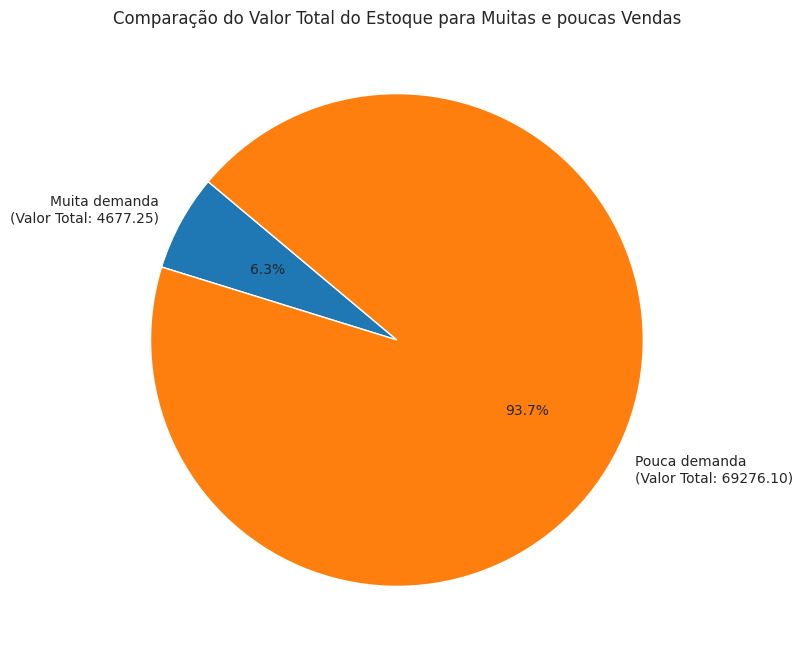

In [186]:
best_sales_filter = (products_df['units_on_order'] > 0) & \
                    (products_df['units_in_stock'] < 100) & \
                    (products_df['reorder_level'] > 1)

best_sales = products_df[best_sales_filter]
best_sales_stock_value = (best_sales['units_in_stock'] * best_sales['unit_price']).sum()

worst_sales_filter = (products_df['units_on_order'] == 0) & \
                     (products_df['units_in_stock'] > 0) & \
                     (products_df['reorder_level'] >= 0)

worst_sales = products_df[worst_sales_filter]
worst_sales_stock_value = (worst_sales['units_in_stock'] * worst_sales['unit_price']).sum()

labels = [f'Muita demanda\n(Valor Total: {best_sales_stock_value:.2f})',
          f'Pouca demanda\n(Valor Total: {worst_sales_stock_value:.2f})']
values = [best_sales_stock_value, worst_sales_stock_value]

plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Comparação do Valor Total do Estoque para Muitas e poucas Vendas')
plt.show()

# Análise de Fornecedores Comuns entre Produtos de Alta e Baixa Demanda
Essa análise é para identificar os fornecedores comuns que atendem tanto a produtos de alta demanda quanto a produtos de baixa demanda. Isso pode fornecer insights valiosos sobre a relação entre fornecedores e o desempenho dos produtos.

### Filtragem de Produtos
Novamente aplicamos o filtro para separar produtos de alta demanda e produtos de baixa demanda.

### Identificação de Fornecedores Comuns
Depois de filtrar os produtos, pegamos os fornecedores comuns entre os produtos de alta demanda e baixa demanda. Isso é feito encontrando a interseção dos IDs de fornecedor `'supplier_id'` entre os dois grupos de produtos.

### Contagem de Produtos Fornecidos por Fornecedores Comuns
A seguir, o DataFrame `'result_df'` armazena informações sobre os fornecedores comuns. Utilizando um loop para iterar sobre os IDs dos fornecedores comuns e calcular a contagem de produtos fornecidos por cada um deles, tanto para produtos de alta quanto de baixa demanda.

### Resultados
O resultado final é uma tabela `'result_df'` que lista os IDs dos fornecedores comuns, a contagem de produtos de alta demanda fornecidos por cada um `'Best_Count'` e a contagem de produtos de baixa demanda fornecidos por cada um `'Worst_Count' `. Com essa tabela fica mais simples traçarmos uma rota para uma solução.

In [187]:
best_sales_filter = (products_df['units_on_order'] > 0) & \
                    (products_df['units_in_stock'] < 100) & \
                    (products_df['reorder_level'] >= 0)

worst_sales_filter = (products_df['units_on_order'] == 0) & \
                     (products_df['units_in_stock'] > 0) & \
                     (products_df['reorder_level'] >= 0)

best_sales = products_df[best_sales_filter]
worst_sales = products_df[worst_sales_filter]

common_supplier_ids = set(best_sales['supplier_id']).intersection(set(worst_sales['supplier_id']))

result_df = pd.DataFrame(columns=['Supplier_ID', 'Best_Count', 'Worst_Count'])

dfs_to_concat = []
for supplier_id in common_supplier_ids:
    best_count = (best_sales['supplier_id'] == supplier_id).sum()
    worst_count = (worst_sales['supplier_id'] == supplier_id).sum()
    supplier_info_df = pd.DataFrame({'Supplier_ID': [supplier_id], 'Best_Count': [best_count], 'Worst_Count': [worst_count]})
    dfs_to_concat.append(supplier_info_df)

result_df = pd.concat(dfs_to_concat, ignore_index=True)
result_df.fillna(0, inplace=True)
result_df = result_df.sort_values(by='Supplier_ID').reset_index(drop=True)

print(result_df.to_string(index=False))

 Supplier_ID  Best_Count  Worst_Count
           2           1            2
           4           1            2
           5           1            1
           7           1            3
           8           2            3
          12           1            3
          14           2            1
          17           1            2
          20           1            2
          21           1            1
          22           1            1
          23           1            2
          26           1            1


# Visualização da Proporção de Produtos Descontinuados em Estoque
 Este gráfico proporciona uma visão clara da proporção de produtos descontinuados em relação ao estoque total.

### Identificação de Produtos em Estoque
 identificando os produtos em estoque no DataFrame `('products_df')`. Produtos em estoque são definidos como aqueles com *'Unidades em Estoque'* `('units_in_stock')` superiores a zero.

### Contagem de Produtos Descontinuados
Após a identificação dos produtos em estoque, contamos o número total de produtos disponíveis `('total_products_in_stock')` e também a quantidade de produtos que foram descontinuados `('discontinued' igual a 1)`.

3. Preparação dos Dados para o Gráfico de Donut
Criamos um DataFrame `('df_for_donut_chart')` para organizar os dados necessários para a construção do gráfico de donut. Esse DataFrame contém duas categorias:

* Descontinuados: Representando produtos que não disponiveis.
* Disponíveis: Representando produtos que ainda estão em estoque e são comercializados.

### Geração do Gráfico de Donut
O gráfico de donut é criado utilizando a biblioteca matplotlib. Ele exibe duas partes distintas:

* Descontinuados: Mostra a proporção de produtos descontinuados em estoque.
* Disponíveis: Mostra a proporção de produtos ainda em comercialização.
Um círculo branco no centro do gráfico aumenta a clareza da visualização.

### Resultados e Implicações
O gráfico de donut revela claramente que o desafio principal enfrentado pela empresa está relacionado à gestão de estoque, já que uma pequena parcela está Descontinuados. Essa desproporção sugere que a empresa precisa concentrar seus esforços na otimização e eficácia da gestão de estoque.

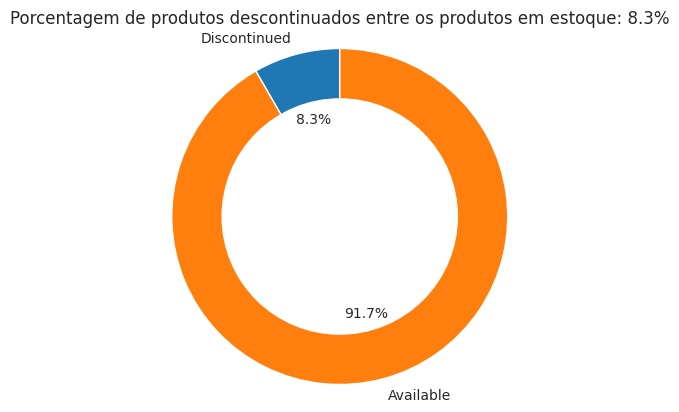

In [188]:
products_in_stock = products_df[products_df['units_in_stock'] > 0]


total_products_in_stock = len(products_in_stock)
discontinued_products_in_stock = len(products_in_stock[products_in_stock['discontinued'] == 1])
percentage_discontinued_in_stock = (discontinued_products_in_stock / total_products_in_stock) * 100

data = {'Status': ['Discontinued', 'Available'],
        'Count': [discontinued_products_in_stock, total_products_in_stock - discontinued_products_in_stock]}
df_for_donut_chart = pd.DataFrame(data)

fig, ax = plt.subplots()
ax.pie(df_for_donut_chart['Count'], labels=df_for_donut_chart['Status'], autopct='%1.1f%%', startangle=90,
       wedgeprops=dict(width=0.4, edgecolor='w'))

center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(center_circle)

ax.axis('equal')

plt.title(f"Porcentagem de produtos descontinuados entre os produtos em estoque: {percentage_discontinued_in_stock:.1f}%")
plt.show()

### Clusterização de Produtos
Este trecho de código tem como objetivo realizar uma análise de clusterização dos produtos da empresa. A clusterização é uma técnica de aprendizado de maquina não supervisionado que agrupa itens semelhantes em clusters, permitindo uma melhor compreensão da estrutura dos dados e a segmentação de produtos em grupos com características semelhantes, Ele sera utilizado para a solução da gestão de estoque.

### Seleção de Features Relevantes
 selecionando um conjunto de características *(features)* relevantes para a análise. As features escolhidas incluem o preço unitário `('unit_price')`, as unidades em estoque `'units_in_stock'`, as unidades em pedido `'units_on_order'` e o nível de reposição` ('reorder_level')` dos produtos. Essas características serão usadas para determinar a similaridade entre os produtos.

### Padronização dos Dados
Antes da clusterização, é essencial padronizar as características para garantir que todas tenham a mesma escala. Isso é feito com o auxílio da classe StandardScaler(). A padronização transforma as características para que tenham média zero e desvio padrão igual a um.

### Redução de Dimensionalidade com PCA
A próxima etapa envolve a redução da dimensionalidade dos dados para facilitar a visualização. Foi utilizado a Análise de Componentes Principais (PCA) para reduzir as características para apenas duas dimensões `('Componente Principal 1' e 'Componente Principal 2')`. Isso permite que visualizar os produtos em um gráfico bidimensional, facilitando a identificação de clusters.

### Clusterização com K-Means
O algoritmo K-Means é aplicado para realizar a clusterização. O número de clusters ('num_clusters') é definido como 3. O K-Means atribui cada produto a um dos clusters com base em sua proximidade com os centroides dos clusters.

### Atribuição de Clusters aos Produtos
Os rótulos dos clusters são atribuídos a cada produto e são adicionados como uma nova coluna chamada 'Cluster' ao DataFrame original ('products_df'). Isso permite que cada produto seja associado ao cluster ao qual pertence.

### Resultados
A clusterização de produtos com base em características relevantes fornecer informações, como, segmentações de produtos, identificação de grupos de produtos semelhantes e insights para estratégias de marketing ou gestão de estoque. Esta análise vai ser crucial para o entendimento e a aplicação da solução.



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


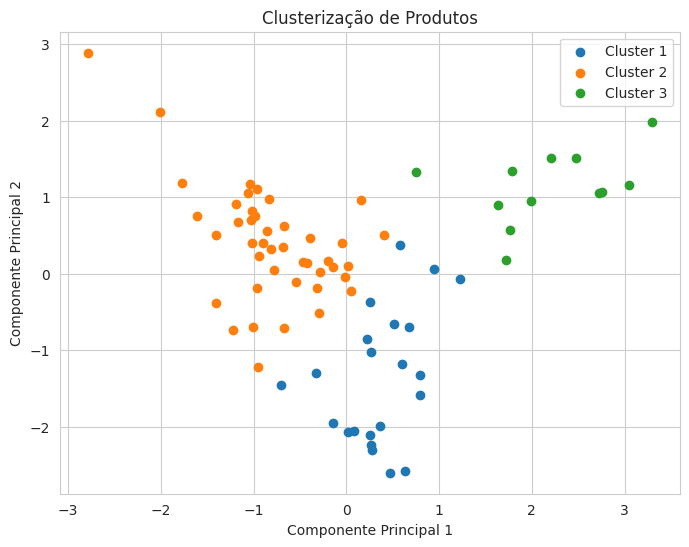

In [189]:
features = ['unit_price', 'units_in_stock', 'units_on_order', 'reorder_level']

selected_features_df = products_df[features]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features_df)

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(scaled_features)


products_df['Cluster'] = kmeans.labels_


plt.figure(figsize=(8, 6))
for cluster in range(num_clusters):
    cluster_data = reduced_features[products_df['Cluster'] == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster + 1}')

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusterização de Produtos')
plt.legend()
plt.show()

 # listando os produtos em cada cluster após a clusterização.
  O código percorre cada cluster e exibe os produtos pertencentes a cada um deles. Esta saída lista os produtos agrupados em cada cluster, facilitando a compreensão das associações feitas pelo algoritmo de clusterização.

In [190]:
for cluster in range(num_clusters):
    cluster_products = products_df[products_df['Cluster'] == cluster]
    print(f"Produtos no Cluster {cluster + 1}:")
    print(cluster_products[['product_id', 'product_name']])
    print("\n")

Produtos no Cluster 1:
    product_id                     product_name
5            6     Grandma's Boysenberry Spread
21          22              Gustaf's Knäckebröd
22          23                         Tunnbröd
24          25          NuNuCa Nuß-Nougat-Creme
26          27               Schoggi Schokolade
32          33                          Geitost
33          34                    Sasquatch Ale
35          36                      Inlagd Sill
39          40                 Boston Crab Meat
40          41  Jack's New England Clam Chowder
42          43                      Ipoh Coffee
49          50                 Valkoinen suklaa
51          52                         Filo Mix
54          55                     Pâté chinois
55          56           Gnocchi di nonna Alice
56          57                   Ravioli Angelo
57          58           Escargots de Bourgogne
60          61                   Sirop d'érable
69          70                    Outback Lager
72          73   

# Resumo dos Clusters de Produtos
outra parte que facilita a compreensão das características e métricas-chave de cada cluster de produtos.

* Quantidade de Produtos: Mostra o número de produtos em cada cluster, ou seja, quantos produtos estão agrupados.

* Total de Unidades em Estoque: Apresenta o total de unidades de produtos disponíveis em estoque em cada cluster.

* Total de Unidades em Pedido: Indica o total de unidades de produtos que estão em processo de pedido em cada cluster.

* Valor Médio dos Preços Unitários: Calcula o valor médio dos preços unitários dos produtos em cada cluster.

In [191]:
cluster_stock = products_df.groupby('Cluster')['units_in_stock'].sum()
cluster_orders = products_df.groupby('Cluster')['units_on_order'].sum()

# Calcula o valor médio dos preços unitários para cada cluster
cluster_mean_price = products_df.groupby('Cluster')['unit_price'].mean()

for cluster in range(cluster_stock.index.min(), cluster_stock.index.max() + 1):
    cluster_stock_count = cluster_stock.get(cluster, 0)
    cluster_orders_count = cluster_orders.get(cluster, 0)
    cluster_price_mean = cluster_mean_price.get(cluster, 0)

    print(f"Cluster {cluster}:")
    print(f"Quantidade de produtos: {len(products_df[products_df['Cluster'] == cluster])}")
    print(f"Total de unidades em estoque: {cluster_stock_count}")
    print(f"Total de unidades em pedido: {cluster_orders_count}")
    print(f"Valor médio dos preços unitários: {cluster_price_mean}")
    print("\n")

Cluster 0:
Quantidade de produtos: 22
Total de unidades em estoque: 1718
Total de unidades em pedido: 30
Valor médio dos preços unitários: 19.304545454545455


Cluster 1:
Quantidade de produtos: 43
Total de unidades em estoque: 1270
Total de unidades em pedido: 30
Valor médio dos preços unitários: 36.57


Cluster 2:
Quantidade de produtos: 12
Total de unidades em estoque: 131
Total de unidades em pedido: 720
Valor médio dos preços unitários: 18.583333333333332




# Apresentando solução
Para Aumentar o Ticket Médio e Reduzir o Churn
Após toda essa análise foi identificada uma solução estratégica para atingir dois objetivos cruciais: **aumentar o ticket médio e diminuir o churn**.

### Desafios Inicial
A Northwind Traders enfrentava desafios relacionados à integração de dados de diferentes áreas da empresa, bem como ao aumento do conflito nas reuniões devido a divergências nos relatórios. Além disso, a empresa buscava uma visão integrada de seus dados para orientar as estratégias de crescimento.

### Solução Encontrada
Após uma avaliação minuciosa, ficou claro que uma das soluções mais promissoras era implementar um programa de desconto cruzado. Essa estratégia consiste em oferecer descontos em produtos adicionais ao cliente, incentivando compras complementares.

#### **Por que o Desconto Cruzado?**

Aumento do Ticket Médio: A oferta de descontos em produtos relacionados incentiva os clientes a comprar mais itens do que inicialmente planejavam. Isso resulta em um aumento no valor médio das compras.

Diminuição do Churn: Ao proporcionar uma experiência de compra mais valiosa e vantajosa para o cliente, o desconto cruzado contribui para reduzir a taxa de churn. Clientes satisfeitos e que percebem valor em suas compras tendem a permanecer leais à empresa.

### Implementação Técnica
A implementação da estratégia de desconto cruzado envolveu a utilização de análise de dados e aprendizado de máquina. Foram consideradas diversas variáveis, como preço unitário, estoque, pedidos, nível de reposição e clusters de produtos. Um modelo de regressão linear foi treinado para prever os descontos cruzados com base nessas variáveis.

In [192]:
products_df['cross_sell_discount_percent'] = 0.20 + 0.05 * products_df['units_on_order']

# Aplique a condição de que units_in_stock deve ser maior que 30 para aplicar o desconto
products_df.loc[products_df['units_in_stock'] <= 30, 'cross_sell_discount_percent'] = 0

# desconto não excede 60%
products_df['cross_sell_discount_percent'] = np.clip(products_df['cross_sell_discount_percent'], 0, 0.60)

X = products_df[['unit_price', 'units_in_stock', 'units_on_order', 'reorder_level', 'Cluster']]
y = products_df['cross_sell_discount_percent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# previsões
y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
print(f"Erro Médio Absoluto (MAE): {mae}")

Erro Médio Absoluto (MAE): 0.0478841235604866


# Previsão de Desconto Cruzado (Cross-Sell)
Neste trecho de código, estamos criando um modelo de previsão de desconto cruzado (cross-sell discount) com base em diferentes características dos produtos.

## Etapas:
* Cálculo do Desconto Cruzado Inicial:

  Inicialmente o desconto cruzado é de 20% mais 5% do número de unidades em pedido `('units_on_order')` para cada produto diferente.

* Condição para Aplicação de Desconto:

 Foi aplicado uma condição: o desconto só será aplicado se o número de unidades em estoque `('units_in_stock')` for maior que 30. Caso contrário, o desconto é definido como 0%.

* Limite de Desconto:

  Também limitamos o desconto para não exceder 60% para evitar descontos excessivamente altos.

### Previsões e Avaliação do Modelo:

O modelo é utilizado para fazer previsões (y_pred) com base nos dados de teste. Em seguida, calculamos o Erro Médio Absoluto (MAE), que quantifica o quão próximo as previsões estão dos valores reais de desconto cruzado. Quanto menor o MAE, melhor o desempenho do modelo.

# Resumo do Relatório
O relatório de análise de indicadores da Northwind Traders destaca uma solução  para a empresa, focada em aumentar o ticket médio e reduzir o churn. A empresa enfrentava desafios relacionados à integração de dados e à necessidade de uma visão integrada de suas operações.

### Solução Proposta
A solução proposta consiste na implementação de um programa de desconto cruzado. Essa estratégia envolve oferecer descontos em produtos adicionais aos clientes, incentivando compras complementares.
* Os principais motivos para essa escolha são:

  1. Aumento do Ticket Médio: O desconto cruzado estimula os clientes a comprar mais, resultando em um aumento no valor médio das compras.

  1. Diminuição do Churn: Proporcionar uma experiência valiosa e vantajosa aos clientes contribui para a redução da taxa de churn, mantendo-os leais à empresa.

### Implementação Técnica
A implementação da estratégia de desconto cruzado envolveu análise de dados e aprendizado de máquina, utilizando variáveis como preço, estoque, pedidos, níveis de reposição e clusters de produtos. Um modelo de regressão linear foi treinado para prever descontos cruzados com base nessas variáveis.

### Resultados Esperados
A estratégia de desconto cruzado visa a melhoria do desempenho da empresa, com receitas mais elevadas por compra e uma base de clientes mais sólida. Isso cria uma experiência de compra mais satisfatória para os clientes.